In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
%matplotlib inline

In [3]:
def p(x,mu,sigma):
    return sp.multivariate_normal.pdf(x, mean=mu, cov=sigma)

def g(d, t, r, u, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
    return np.matmul(x, M)

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 2]])

def h(d, t, r, u, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
               
    p0 = p(x, mu, sigma)
    p1 = p(x, np.matmul(mu, M), np.matmul(np.transpose(M), np.matmul(sigma, M)))
    return p0/(p0 + p1)

In [6]:
#d, t plane

N = 10**3
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 2*np.pi
low_1 = 0
high_2 = 3
low_2 = -3
r = 1
u = 0
step = 30
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for t in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, xx)) - np.log(e+1.-h(d, t, r, u, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

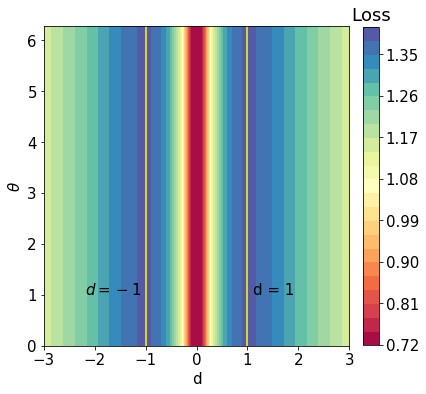

In [14]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)

fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('d')
ax.set_ylabel(r'$\theta$')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
clb = fig.colorbar(cf, ax=ax, fraction=0.0475, pad=0.04)
clb.ax.set_title('Loss')
plt.axvline(x=1, color='yellow')
plt.axvline(x=-1, color='yellow')
ax.annotate('d = 1', xy=(1.1, 1), color='black')
ax.annotate(r'$d=-1$', xy=(-2.2, 1), color='black')
plt.savefig("GL2symmDT.pdf",  bbox_inches='tight')

In [13]:
#d, r plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = 0.1
high_2 = 3
low_2 = -3
t = 0
u = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for r in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, xx)) - np.log(e+1.-h(d, t, r, u, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

Text(-0.9, 1, '(1, -1)')

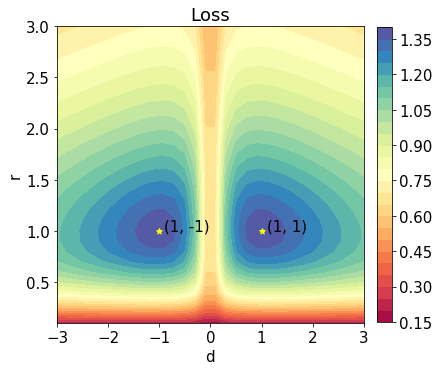

In [23]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)

fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect(2)
ax.set_xlabel('d')
ax.set_ylabel('r')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax,
             fraction=0.044, pad=0.04
            )
plt.title('Loss')
plt.scatter([1, -1], [1, 1], marker='*', c='yellow')
ax.annotate('(1, 1)', xy=(1.1, 1))
ax.annotate('(1, -1)', xy=(-0.9, 1))
#plt.savefig("6GL2asymmDR.pdf", bbox_inches='tight')

In [24]:
#d, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 3
low_2 = -3
t = 0
r = 1
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, xx)) - np.log(e+1.-h(d, t, r, u, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

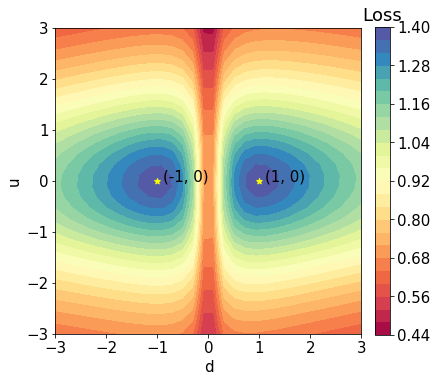

In [30]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('d')
ax.set_ylabel('u')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
clb = fig.colorbar(cf, ax=ax,
             fraction=0.046, pad=0.04
                  )
clb.ax.set_title('Loss')
plt.scatter([1, -1], [0, 0], marker='*', c='yellow')
ax.annotate('(1, 0)', xy=(1.1, 0))
ax.annotate('(-1, 0)', xy=(-0.9, 0))
plt.savefig("6GL2asymmDU.pdf", bbox_inches='tight')

In [8]:
#t, r plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = 0.1
high_2 = 2*np.pi + 0.2
low_2 = -0.5
d = -1
u = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for r in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for t in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, xx)) - np.log(e+1.-h(d, t, r, u, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

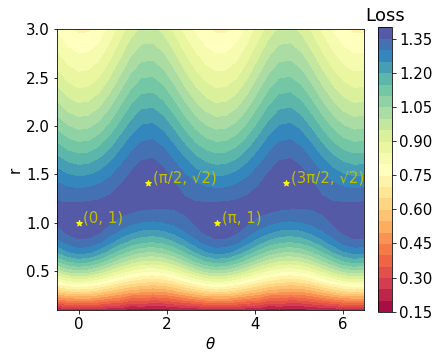

In [9]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect(2.2)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('r')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
clb = fig.colorbar(cf, ax=ax,
             fraction=0.0425, pad=0.04)
clb.ax.set_title('Loss')
plt.scatter([0, np.pi/2, np.pi, 3*np.pi/2], [1, np.sqrt(2), 1, np.sqrt(2)], marker='*', c='yellow')
ax.annotate('(0, 1)', xy=(0.1, 1), color='y')
ax.annotate('(π, 1)', xy=(np.pi+0.1, 1), color='y')
ax.annotate('(π/2, √2)', xy=(np.pi/2 + 0.1, np.sqrt(2)), color='y')
ax.annotate('(3π/2, √2)', xy=(np.pi*1.5+ 0.1, np.sqrt(2)), color='y')
plt.savefig("6GL2asymmTR.pdf",  bbox_inches='tight')

In [26]:
#t, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 2*np.pi
low_2 = 0
d = -1
r = 1
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for t in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, xx)) - np.log(e+1.-h(d, t, r, u, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

Text(1, 1.1, 'u = 0')

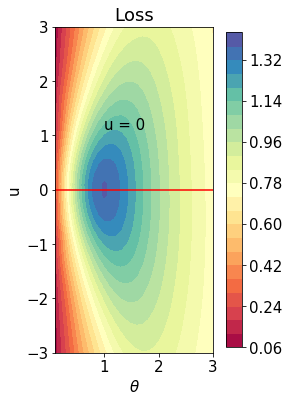

In [33]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('u')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax,
             fraction=0.047, pad=0.04)
plt.title('Loss')
plt.axhline(y=0, color='red', label='x=1')
ax.annotate('u = 0', xy=(1, 1.1))
#plt.savefig("6GL2asymmTU.pdf")

In [31]:
#r, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 3
low_2 = 0.1
d = 1
t = np.pi
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for r in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, xx)) - np.log(e+1.-h(d, t, r, u, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

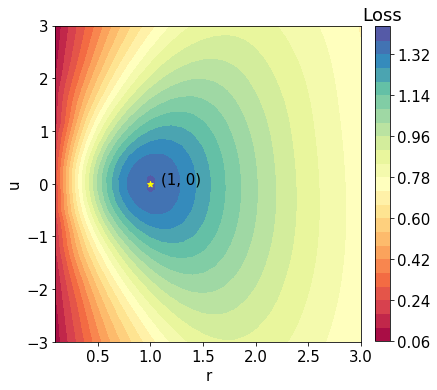

In [36]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))
plt.rc('font', size=15)

ax.set_aspect(0.5)
ax.set_xlabel('r')
ax.set_ylabel('u')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
clb = fig.colorbar(cf, ax=ax,
             fraction=0.047, pad=0.04)
clb.ax.set_title('Loss')
plt.scatter([1], [0], marker='*', c='yellow')
ax.annotate('(1, 0)', xy=(1.1, 0))
plt.savefig("6GL2symmRU.pdf" ,  bbox_inches='tight')